In [227]:
import pandas as pd
import numpy as np

In [228]:
st1 = pd.read_csv('st1.txt',skiprows=28,delimiter='\t',index_col='datetime',parse_dates=True)[1:]
st2 = pd.read_csv('st2.txt',skiprows=28,delimiter='\t',index_col='datetime',parse_dates=True)[1:]
st3 = pd.read_csv('st3.txt',skiprows=28,delimiter='\t',index_col='datetime',parse_dates=True)[1:]
st4 = pd.read_csv('st4.txt',skiprows=28,delimiter='\t',index_col='datetime',parse_dates=True)[1:]
st1.columns = ['agency','site','pp1','code']
st2.columns = ['agency','site','pp2','code']
st3.columns = ['agency','site','pp3','code']
st4.columns = ['agency','site','pp4','code']
st1.pp1 = pd.to_numeric(st1.pp1, errors='coerce')
st2.pp2 = pd.to_numeric(st2.pp2, errors='coerce')
st3.pp3 = pd.to_numeric(st3.pp3, errors='coerce')
st4.pp4 = pd.to_numeric(st4.pp4, errors='coerce')

<AxesSubplot:>

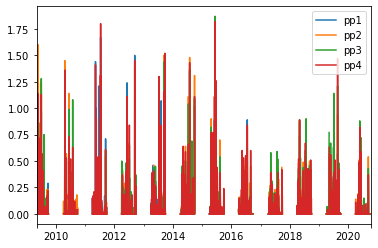

In [229]:
merged = pd.concat([st1.pp1, st2.pp2, st3.pp3, st4.pp4], axis=1)
merged.index = pd.to_datetime(merged.index)
merged.plot()

In [230]:
merged.head()

,pp1,pp2,pp3,pp4
2009-05-05,0.00,NaN,NaN,0.00
2009-05-06,0.00,0.00,NaN,0.00
2009-05-07,0.00,0.01,NaN,0.00
2009-05-08,0.01,0.00,NaN,0.00
2009-05-09,0.08,0.04,NaN,0.06


In [231]:
#!pip install openpyxl

In [232]:
merged.to_excel('merged.xlsx')

In [233]:
merged['2013-04']

,pp1,pp2,pp3,pp4
2013-04-01,0.00,0.01,0.01,0.01
2013-04-02,0.10,0.08,0.08,0.08
2013-04-03,0.02,0.02,0.01,0.02
2013-04-04,0.00,0.00,0.00,0.00
2013-04-05,0.00,0.00,0.00,0.00
2013-04-06,0.00,0.00,0.00,0.00
2013-04-07,0.00,0.00,0.00,0.00
2013-04-08,0.00,0.00,0.00,0.00
2013-04-09,0.00,0.00,0.00,0.00
2013-04-10,0.07,0.01,0.00,0.14


<AxesSubplot:>

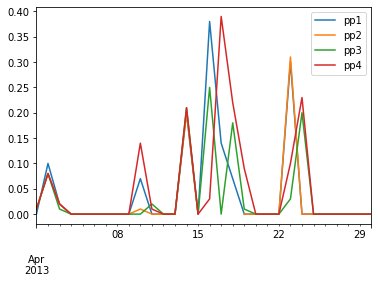

In [234]:
merged['2013-04'].plot(kind='line')

In [235]:
ppf = merged['2013-04']

## Simple AA

In [236]:
merged['year'] = merged.index.year
grouped = merged.groupby('year').sum()
grouped

,pp1,pp2,pp3,pp4
year,,,,
2009,9.93,13.40,8.92,9.84
2010,0.00,8.96,7.54,7.38
2011,13.16,1.04,1.02,12.76
2012,7.50,7.30,7.51,7.46
2013,12.57,12.24,12.09,12.98
2014,10.79,13.46,12.70,12.52
2015,12.22,13.78,13.06,14.25
2016,5.17,6.67,5.70,7.34
2017,3.32,5.84,5.85,5.17


In [237]:
ppf.corr()

,pp1,pp2,pp3,pp4
pp1,1.000000,0.984123,0.621523,0.405316
pp2,0.984123,1.000000,0.440858,0.503965
pp3,0.621523,0.440858,1.000000,0.480620
pp4,0.405316,0.503965,0.480620,1.000000


In [238]:
ppf[ppf.pp2.isnull()]

,pp1,pp2,pp3,pp4
2013-04-16,0.38,NaN,0.25,0.03
2013-04-17,0.14,NaN,0.00,0.39
2013-04-18,0.07,NaN,0.18,0.22


In [239]:
missingpp = ppf[ppf.pp2.isnull()]
missingpp

,pp1,pp2,pp3,pp4
2013-04-16,0.38,NaN,0.25,0.03
2013-04-17,0.14,NaN,0.00,0.39
2013-04-18,0.07,NaN,0.18,0.22


In [240]:
filled = (missingpp.pp1 + missingpp.pp3 + missingpp.pp4) / (missingpp.shape[-1]-1)
missingpp.pp2 = filled
missingpp

C:\Users\lrbk\miniconda3\lib\site-packages\pandas\core\generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,pp1,pp2,pp3,pp4
2013-04-16,0.38,0.220000,0.25,0.03
2013-04-17,0.14,0.176667,0.00,0.39
2013-04-18,0.07,0.156667,0.18,0.22


## Normal ratio method

In [241]:
a = (grouped.pp2.mean()/((missingpp.shape[-1]-1)))
b = missingpp.pp1/grouped.pp1.mean()
c = missingpp.pp3/grouped.pp3.mean()
d = missingpp.pp4/grouped.pp4.mean()
filled = a * ( b + c + d)
filled

2013-04-16    0.238248
2013-04-17    0.172782
2013-04-18    0.156604
dtype: float64

## Multiple linear regression

In [242]:
ppf = merged['2013-04'][['pp1','pp2','pp3','pp4']]
ppf.head()

,pp1,pp2,pp3,pp4
2013-04-01,0.00,0.01,0.01,0.01
2013-04-02,0.10,0.08,0.08,0.08
2013-04-03,0.02,0.02,0.01,0.02
2013-04-04,0.00,0.00,0.00,0.00
2013-04-05,0.00,0.00,0.00,0.00


In [243]:
ppf2 = ppf[ppf.pp2.notna()]
ppf2.head()

,pp1,pp2,pp3,pp4
2013-04-01,0.00,0.01,0.01,0.01
2013-04-02,0.10,0.08,0.08,0.08
2013-04-03,0.02,0.02,0.01,0.02
2013-04-04,0.00,0.00,0.00,0.00
2013-04-05,0.00,0.00,0.00,0.00


In [ ]:
#!pip install sklearn

In [249]:
from sklearn.linear_model import LinearRegression

In [250]:
mlr = LinearRegression()

In [251]:
mlr.fit(ppf2[['pp1','pp3','pp4']], ppf2['pp2'])

LinearRegression()

In [252]:
print(mlr.intercept_)

0.0003521033419448989


In [253]:
print(mlr.coef_)

[ 1.04274331  0.26539032 -0.28120467]


In [254]:
inter = mlr.intercept_
a1,a3,a4 = mlr.coef_
inter,a1,a3,a4

(0.0003521033419448989,
 1.0427433109141946,
 0.26539031701021926,
 -0.28120466905520397)

In [255]:
missingpp = ppf[ppf.pp2.isnull()]
missingpp

,pp1,pp2,pp3,pp4
2013-04-16,0.38,NaN,0.25,0.03
2013-04-17,0.14,NaN,0.00,0.39
2013-04-18,0.07,NaN,0.18,0.22


In [256]:
inter + missingpp.pp1*a1 + missingpp.pp3*a3 + missingpp.pp4*a4

2013-04-16    0.454506
2013-04-17    0.036666
2013-04-18    0.059249
dtype: float64

## NEURAL NETWORKS

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [189]:
precipStations =  pd.read_csv('Est1_Est2_Est3.csv',index_col=0,parse_dates=True)
precipStations.head()

,Est1,Est2,Est3
Fecha,,,
2014-07-25,0.0,NaN,0.0
2014-07-26,0.6,NaN,0.0
2014-07-27,0.0,NaN,0.0
2014-07-28,0.0,NaN,0.0
2014-07-29,0.2,NaN,0.2


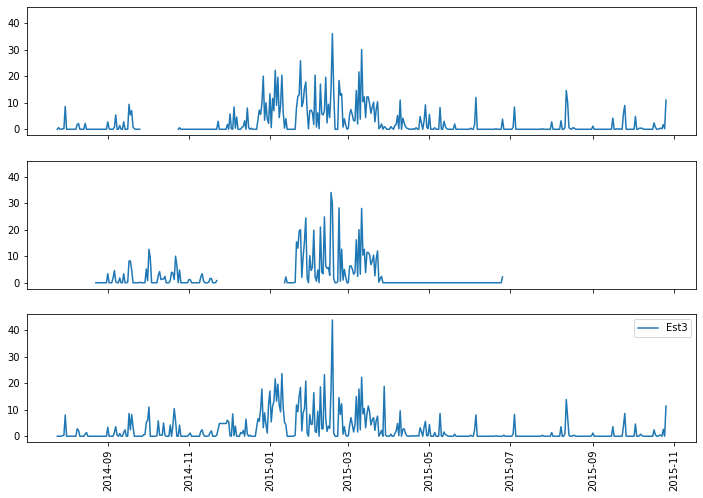

In [190]:
fig, axs=plt.subplots(3,1,figsize=(12,8),sharex=True,sharey=True)
axs[0].plot(precipStations.index,precipStations['Est1'],label='Est1')
axs[1].plot(precipStations.index,precipStations['Est2'],label='Est2')
axs[2].plot(precipStations.index,precipStations['Est3'],label='Est3')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

In [192]:
precipNotNan = precipStations.dropna()
precipNotNan

,Est1,Est2,Est3
Fecha,,,
2014-08-23,0.0,0.0,0.0
2014-08-24,0.0,0.0,0.0
2014-08-25,0.0,0.0,0.0
2014-08-26,0.0,0.0,0.0
2014-08-27,0.0,0.0,0.0
...,...,...,...
2015-06-21,0.0,0.0,0.0
2015-06-22,0.0,0.0,0.0
2015-06-23,0.0,0.0,0.0


In [258]:
xTrain = precipNotNan[['Est1','Est3']]
yTrain = precipNotNan[['Est2']].values.flatten()

In [261]:
#yTrain

In [263]:
scaler = StandardScaler().fit(xTrain)

In [264]:
xTrainScaled = scaler.transform(xTrain)

In [265]:
print(xTrainScaled[:20])

[[-0.53894584 -0.50809201]
 [-0.53894584 -0.50809201]
 [-0.53894584 -0.50809201]
 [-0.53894584 -0.50809201]
 [-0.53894584 -0.50809201]
 [-0.53894584 -0.50809201]
 [-0.53894584 -0.50809201]
 [-0.53894584 -0.50809201]
 [-0.53894584 -0.50809201]
 [-0.04157671  0.123051  ]
 [-0.50341948 -0.50809201]
 [-0.53894584 -0.50809201]
 [-0.53894584 -0.50809201]
 [-0.53894584 -0.50809201]
 [-0.39684038 -0.24820959]
 [ 0.42026606  0.16017706]
 [-0.53894584 -0.43383989]
 [-0.53894584 -0.50809201]
 [-0.29026128 -0.32246171]
 [-0.53894584 -0.50809201]]


In [198]:
#check scaler
print(xTrainScaled.mean(axis=0))
print(xTrainScaled.std(axis=0))

[ 1.00841218e-16 -6.98131509e-17]
[1. 1.]


In [199]:
#regressor
regr = MLPRegressor(random_state=1, max_iter=5000).fit(xTrainScaled, yTrain)

In [200]:
#test
xTest = precipStations[['Est1','Est3']].dropna()
xTestScaled = scaler.transform(xTest)

In [201]:
print(xTest.describe())
print(xTestScaled[:10])

             Est1        Est3
count  431.000000  431.000000
mean     2.376798    2.364269
std      4.948763    4.888289
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      2.200000    2.400000
max     36.000000   43.800000
[[-0.53894584 -0.50809201]
 [-0.43236674 -0.50809201]
 [-0.53894584 -0.50809201]
 [-0.53894584 -0.50809201]
 [-0.50341948 -0.47096595]
 [-0.50341948 -0.43383989]
 [ 0.98868793  0.97695037]
 [-0.53894584 -0.50809201]
 [-0.53894584 -0.50809201]
 [-0.53894584 -0.50809201]]


In [202]:
#regression
yPredict = regr.predict(xTestScaled)
print(yPredict)

[ 0.05938569  0.15278002  0.05938569  0.05938569  0.17877184  0.26853265
  8.31785189  0.05938569  0.05938569  0.05938569  0.05938569  0.05938569
  0.05938569  0.05938569  0.05938569  2.0033938   1.74473144  0.05938569
  0.05938569  0.05938569  0.05938569  0.89314323  0.73099724  0.05938569
  0.05938569  0.05938569  0.05938569  0.05938569  0.05938569  0.05938569
  0.05938569  0.05938569  0.05938569  0.05938569  0.05938569  0.05938569
  0.05938569  0.05938569  2.73922272  0.08901102  0.05938569  0.05938569
  0.05938569  0.90356784  3.80455527  0.23736574  0.05938569  0.80950155
  0.05938569  0.05938569  1.42825595  1.30633847  0.05938569  0.05938569
  9.05783655  2.91940617  7.92509212  2.23777962  0.08901102  0.05938569
  0.05938569  0.05938569  0.05938569  0.05938569  2.56938373  0.05938569
  0.05938569  0.05938569  0.05938569  0.05938569  0.05938569  0.32773075
  0.62177456  0.05938569  0.05938569  0.05938569  0.05938569  0.05938569
  0.05938569  0.05938569  0.95334271  1.30633847  0

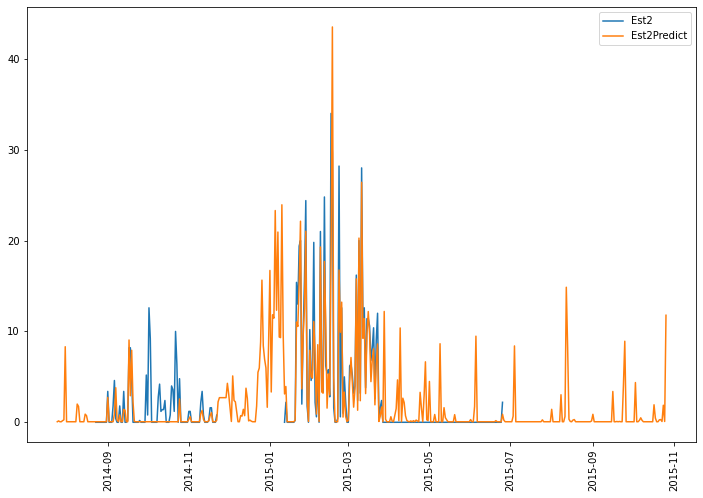

In [203]:
#comparison of station 2
fig, ax=plt.subplots(figsize=(12,8),sharex=True,sharey=True)
ax.plot(precipStations.index,precipStations['Est2'],label='Est2')
ax.plot(xTest.index,yPredict,label='Est2Predict')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

In [266]:
precipStations

,Est1,Est2,Est3,Est2Completed
Fecha,,,,
2014-07-25,0.0,NaN,0.0,0.059386
2014-07-26,0.6,NaN,0.0,0.152780
2014-07-27,0.0,NaN,0.0,0.059386
2014-07-28,0.0,NaN,0.0,0.059386
2014-07-29,0.2,NaN,0.2,0.178772
...,...,...,...,...
2015-10-22,0.4,NaN,0.4,0.299948
2015-10-23,0.2,NaN,0.0,0.089011
2015-10-24,1.8,NaN,2.6,1.877711


In [204]:
precipStations['Est2Completed'] = 0

In [205]:
for index, row in precipStations.iterrows():
    if np.isnan(row['Est2']) and ~np.isnan(row['Est1']) and ~np.isnan(row['Est3']):
        rowScaled = scaler.transform([[row['Est1'],row['Est3']]])
        precipStations.loc[index,['Est2Completed']] = regr.predict(rowScaled)
    elif ~np.isnan(row['Est2']):
        precipStations.loc[index,['Est2Completed']] = row['Est2']
    else:
        row['Est2Completed'] = np.nan

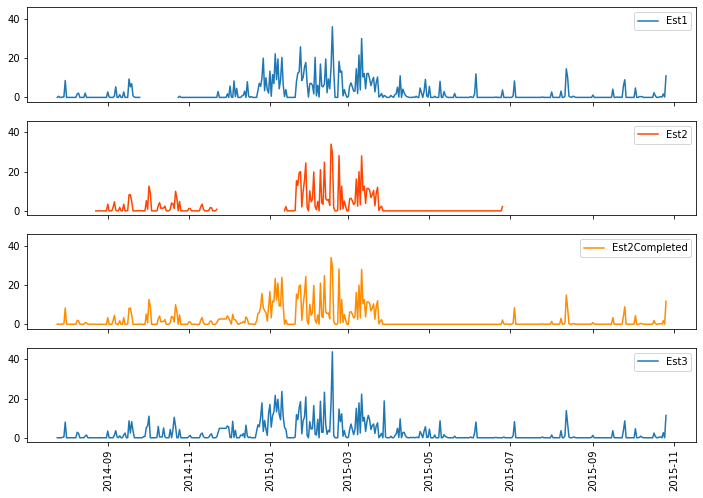

In [206]:
fig, axs=plt.subplots(4,1,figsize=(12,8),sharex=True,sharey=True)
axs[0].plot(precipStations.index,precipStations['Est1'],label='Est1')
axs[0].legend()
axs[1].plot(precipStations.index,precipStations['Est2'],label='Est2',color='orangered')
axs[1].legend()
axs[2].plot(precipStations.index,precipStations['Est2Completed'],label='Est2Completed',color='darkorange')
axs[2].legend()
axs[3].plot(precipStations.index,precipStations['Est3'],label='Est3')
axs[3].legend()
plt.xticks(rotation='vertical')
plt.show()
